In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\maztl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("UNZIP_FOR_NOTEBOOKS_FINAL/DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
x=df.drop('class',axis=1)
y=df['class']
x=pd.get_dummies(x,drop_first=True)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=101)

## Gradient Boosting and Grid Search with CV

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid={
    'n_estimators':[1,5,10,20,40,100],
    'learning_rate':[0.1,0.05,0.2],
    'max_depth':[3,4,5,6]
}

In [23]:
gbmodel=GradientBoostingClassifier()

In [24]:
gridmodel=GridSearchCV(gbmodel,param_grid)

In [25]:
gridmodel.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [15]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [16]:
pred=gridmodel.predict(X_test)

In [26]:
gridmodel.best_params_  # gridmodel.best_estimator_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [28]:
gridmodel.best_estimator_.feature_importances_

array([2.91150176e-04, 2.53913670e-16, 1.00514231e-17, 0.00000000e+00,
       1.95607079e-17, 1.05030313e-03, 0.00000000e+00, 2.20043744e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.83999020e-18, 0.00000000e+00, 0.00000000e+00, 2.22085608e-08,
       2.31055039e-03, 5.28298992e-02, 1.84253604e-04, 2.13040349e-02,
       1.82499853e-02, 1.66891461e-04, 6.14762854e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.03950811e-02, 0.00000000e+00, 1.62471172e-16, 0.00000000e+00,
       1.01388231e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.18813479e-16, 0.00000000e+00, 7.16081323e-18, 0.00000000e+00,
       2.92091629e-04, 1.28947253e-03, 1.36082024e-01, 4.69032068e-03,
       2.78926026e-02, 8.13523673e-04, 6.65594939e-05, 4.95063766e-06,
       0.00000000e+00, 0.00000000e+00, 3.95425907e-02, 3.15489914e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [29]:
feats=gridmodel.best_estimator_.feature_importances_

In [34]:
imp_feat=pd.DataFrame(index=x.columns,data=feats,columns=['Importance'])
imp_feat=imp_feat[imp_feat['Importance']>0.0005].sort_values('Importance')

In [36]:
imp_feat

,Importance
population_y,0.000680
stalk-surface-above-ring_k,0.000814
cap-surface_g,0.001050
population_c,0.001179
stalk-root_b,0.001289
ring-type_p,0.001292
stalk-color-below-ring_c,0.002105
cap-color_y,0.002311
stalk-color-below-ring_y,0.003023
stalk-color-above-ring_c,0.003155


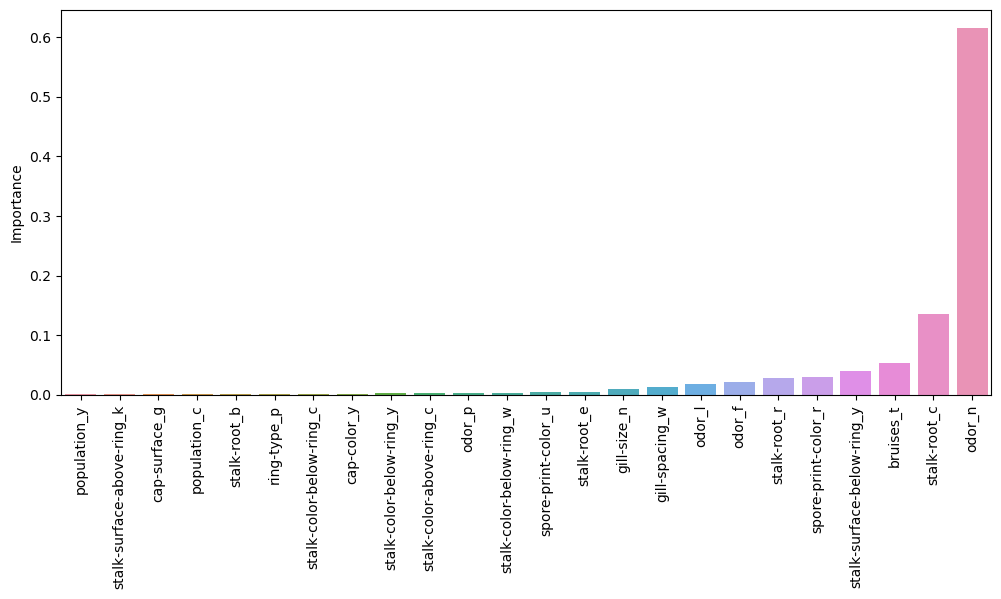

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);
plt.show()